# loading the libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the DataSet

In [278]:
db_data = pd.read_csv("OPENDATA_BOOKING_CARSHARING.csv", sep=';', header=0)
db_data[548069:]

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
548069,46385327,100001,149218,B45F2CFD95C5887698AD87B6596102E24DCCE243,2017-05-16 07:15:07,2017-05-16 07:15:00,2017-05-16 08:15:00,Nein,Ja,NaN,Sredzkistraße,402667,Sredzkistraße,402667,Station,Berlin,Flinkster iPhone
548070,46385351,100001,174116,954FB74EF255E4089D3D7DA3FE6234DE781BFDD3,2017-05-16 07:16:29,2017-05-16 08:30:00,2017-05-16 12:30:00,Nein,Nein,NaN,Bf Köln Messe/Deutz,400755,Bf Köln Messe/Deutz,400755,Station,Köln,Internet
548071,46385778,100001,173552,A986BBFA0F81DD3D2EB02A97A30A97CF111BD2C1,2017-05-16 07:37:19,2017-05-16 08:45:00,2017-05-18 09:45:00,Nein,Nein,NaN,Hbf Saarbrücken,400280,Hbf Saarbrücken,400280,Station,Saarbrücken,Internet
548072,46385814,100012,169106,1127C45D5E5C398FE0BCAF07D6C6694C2C9E0B0B,2017-05-16 07:39:22,2017-05-16 07:45:00,2017-05-16 10:45:00,Nein,Nein,NaN,Hbf Gelsenkirchen,406277,Hbf Gelsenkirchen,406277,Station,Gelsenkirchen,Internet


In [279]:
columns = ['START_RENTAL_ZONE','START_RENTAL_ZONE_HAL_ID','END_RENTAL_ZONE','END_RENTAL_ZONE_HAL_ID','RENTAL_ZONE_HAL_SRC'] 
db_data.drop(columns, inplace=True, axis=1)

In [291]:
db_data.describe()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DISTANCE,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
count,5.480730e+05,548073.000000,548073.000000,547872.000000,548073.000000,548073.000000,548073.000000,548073.000000,548073.000000,548073.000000,548073.000000
mean,3.186900e+07,99387.465604,158833.711316,77.186951,2015.074563,6.083903,2.883780,6.112432,6.106887,3.099671,3.185320
std,7.206038e+06,8092.127076,7750.289663,159.879398,0.968439,3.448084,1.960657,3.443219,3.441489,1.964538,1.983976
min,1.784220e+07,24.000000,143031.000000,0.000000,2013.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.601109e+07,100001.000000,151336.000000,14.000000,2014.000000,3.000000,1.000000,3.000000,3.000000,1.000000,1.000000
50%,3.061083e+07,100003.000000,156818.000000,32.000000,2015.000000,6.000000,3.000000,6.000000,6.000000,3.000000,3.000000
75%,3.718012e+07,100012.000000,163398.000000,80.000000,2016.000000,9.000000,5.000000,9.000000,9.000000,5.000000,5.000000
max,4.638581e+07,801003.000000,181564.000000,27500.000000,2017.000000,12.000000,6.000000,12.000000,12.000000,6.000000,6.000000


In [309]:
#db_data.groupby('CUSTOMER_HAL_ID')['BOOKING_HAL_ID'].apply(np.unique)

In [293]:
db_data.pivot_table(columns='BOOKING_HAL_ID')

BOOKING_HAL_ID,17842196,18270895,19054992,19057626,19313282,19313291,19479182,19508250,19923967,19960704,...,46384575,46384675,46384746,46384815,46384875,46385140,46385327,46385351,46385778,46385814
BOOKING_MONTH,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,9.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
BOOKING_WDAY,2.0,1.0,3.0,3.0,1.0,1.0,2.0,4.0,6.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BOOKING_YEAR,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,...,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0
CATEGORY_HAL_ID,100012.0,100003.0,100012.0,100003.0,100001.0,100001.0,100007.0,100006.0,100012.0,100012.0,...,100001.0,100001.0,100001.0,100001.0,100003.0,100001.0,100001.0,100001.0,100001.0,100012.0
DISTANCE,14.0,84.0,1036.0,681.0,60.0,61.0,1365.0,176.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FROM_MONTH,1.0,5.0,6.0,2.0,5.0,8.0,1.0,5.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
FROM_WDAY,6.0,1.0,5.0,5.0,4.0,2.0,2.0,5.0,6.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
UNTIL_MONTH,1.0,5.0,6.0,2.0,5.0,8.0,1.0,5.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
UNTIL_WDAY,6.0,1.0,6.0,5.0,4.0,2.0,0.0,6.0,6.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
VEHICLE_HAL_ID,150359.0,149335.0,151333.0,149540.0,150574.0,150574.0,148005.0,156308.0,150359.0,150715.0,...,161598.0,173538.0,173540.0,173964.0,170520.0,174185.0,149218.0,174116.0,173552.0,169106.0


In [135]:
#db_data['START_RENTAL_ZONE'].value_counts()

In [136]:
db_data['RENTAL_ZONE_HAL_SRC'].value_counts()

Station    548073
Name: RENTAL_ZONE_HAL_SRC, dtype: int64

In [137]:
#db_data.applymap(lambda x: not x or pd.isnull(x)).sum()

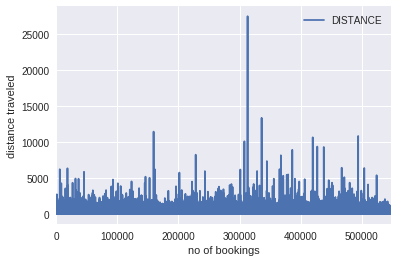

In [214]:
dist = db_data['DISTANCE'].plot(legend=True)
dist.set_xlabel('no of bookings')
dist.set_ylabel('distance traveled')

In [213]:
#db_data[['RENTAL_ZONE_HAL_SRC', 'DISTANCE']].plot()

In [140]:
db_data['TECHNICAL_INCOME_CHANNEL'].value_counts(dropna=False)

Internet                       324400
Flinkster iPhone               101971
Flinkster Android               52498
NaN                             51976
ICS-Server                       3177
Flinkster Windows                2212
Multicity iPhone                 1971
Broker HAL                       1857
Multicity Android                1412
BwFPS Portal Web                 1182
BwCarsharing iPhone               880
Bahn_de_2                         820
HALAPI Teilauto                   732
BwCarsharing Android              649
Book-n-Drive iPhone               545
Onesto_Bahn                       338
API                               236
Book-n-Drive Android              228
ford2go iPhone                    147
ford2go Android                   146
Scouter 255 Web Praegnanz         135
Scouter 255 iOS 2Denker           122
teilAuto                          120
Ford Carsharing FordPass           61
Scouter 255 Android 2Denker        53
Flinkster Connect                  46
BwFPS Dispo 

In [141]:
#db_data.iloc[:,6:].plot()
#plt.show()

In [142]:
db_data[db_data.DISTANCE.isnull()].sort_index()
#0 and NaN vales?

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
275259,30665145,1005,163420,9680D41CFEFE292240253676FF6DD6C242B98EFD,2015-06-20 19:21:21,2017-04-23 14:30:00,2017-04-23 16:30:00,Nein,Nein,NaN,Bernkasteler Straße,401768,Bernkasteler Straße,401768,Station,Köln,Internet
343188,34258651,100001,171766,9D61F291D6A65B838481ED49CBC85960616A1ADA,2015-11-19 14:53:37,2016-06-06 12:00:00,2020-01-01 12:00:00,Nein,Nein,NaN,Mainzer Landstraße 169-171,403001,Mainzer Landstraße 169-171,403001,Station,Frankfurt am Main,NaN
520467,44432660,100003,170431,83B22AFB6ECD16ECAE0135BADB343F76FF103B71,2017-02-23 08:05:54,2017-03-03 18:00:00,2017-06-28 19:00:00,Nein,Nein,NaN,Hauptbahnhof C Berlin,402268,Hauptbahnhof C Berlin,402268,Station,Berlin,Internet
525364,44691046,100003,167717,A127C197910157ADC7E5402E29EA700499C53DF7,2017-03-09 08:37:44,2017-05-08 07:00:00,2017-05-19 18:00:00,Nein,Nein,NaN,Caroline-Michaelis-Straße,400342,Caroline-Michaelis-Straße,400342,Station,Berlin,Internet
527643,44829217,100003,172281,116F52A4AB4C690158B17C95AE198FA30CF680F6,2017-03-15 14:59:26,2017-03-20 09:00:00,2017-05-31 18:00:00,Nein,Nein,NaN,NEU NEU Hbf Hannover (Augustenstraße),404522,NEU NEU Hbf Hannover (Augustenstraße),404522,Station,Hannover,Internet
529347,44927199,100001,173503,DFA04EB01B091670F6F30AA7BD56D831184D81E2,2017-03-20 13:47:56,2017-05-13 17:30:00,2017-05-18 12:00:00,Ja,Nein,NaN,Hbf Saarbrücken,400280,Hbf Saarbrücken,400280,Station,Saarbrücken,NaN
530644,45021739,100005,180798,A075F9BA1156D916B5A22B6627521F72A848CB2B,2017-03-24 10:13:11,2017-05-15 07:00:00,2017-05-18 12:00:00,Nein,Nein,NaN,Hbf Stuttgart,32931,Hbf Stuttgart,32931,Station,Stuttgart,Internet
531276,45060017,100001,161595,F84361D042B7994A0B18B6ABD3E1ABCC8064B172,2017-03-25 16:55:54,2017-04-29 10:15:00,2017-04-29 11:15:00,Nein,Nein,NaN,Hauptbahnhof A Berlin,400657,Hauptbahnhof A Berlin,400657,Station,Berlin,Internet
531486,45076525,100001,173505,CF384FBBD497F1973F13DCFC64A91BE64E0529E1,2017-03-26 13:57:36,2017-05-15 14:00:00,2017-05-16 09:30:00,Nein,Ja,NaN,ZOB Oldenburg,400346,ZOB Oldenburg,400346,Station,Oldenburg (Oldb),Internet
532098,45130984,100003,172294,9A545C36C5C51EDEF75244FCD203E31B7353AC1B,2017-03-28 11:35:51,2017-05-16 06:00:00,2017-05-18 22:30:00,Nein,Ja,NaN,Bahnhofsstraße,404528,Bahnhofsstraße,404528,Station,Lüneburg,BwFPS Portal Web


In [143]:
db_data[db_data['DISTANCE']==0].sort_index()
#db_data.loc[db_data['DISTANCE'].isnull()].sum()


,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
8,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,Nein,Nein,0.0,Bernkasteler Straße,401768,Bernkasteler Straße,401768,Station,Köln,Internet
9,19960704,100012,150715,E1B1BF157BDEF3542D79DC7EDF30437B9DC69B4A,2013-09-17 17:59:03,2014-01-11 09:45:00,2014-01-11 16:15:00,Nein,Nein,0.0,Hbf 1 Siegburg (Wilhelmstr.),400263,Hbf 1 Siegburg (Wilhelmstr.),400263,Station,Siegburg,Internet
13,19969161,100006,151781,9D562F0C6E92EF378FE4CE66133949E212B429D2,2013-09-18 10:37:46,2014-01-22 10:15:00,2014-01-22 20:15:00,Ja,Nein,0.0,Hbf Hamburg,400226,Hbf Hamburg,400226,Station,Hamburg,NaN
18,20263201,100012,150782,CAD3A8B07B1103B402AB30FA2EA1925821A6EABE,2013-10-07 08:29:51,2014-03-26 18:00:00,2014-03-27 06:30:00,Nein,Nein,0.0,Hbf Offenburg,400575,Hbf Offenburg,400575,Station,Offenburg,Internet
24,20374549,100001,150242,1A990A99759A9CF9A3A32340558E108BD818BFD3,2013-10-14 16:31:32,2014-08-02 10:30:00,2014-08-02 13:30:00,Nein,Nein,0.0,Hbf 2 Mannheim Parkhaus 3 Keplerstraße,400917,Hbf 2 Mannheim Parkhaus 3 Keplerstraße,400917,Station,Mannheim,Internet
55,20802688,100012,151228,829D300CB37F2C33D317A278E014EC9082CF9311,2013-11-10 18:20:01,2014-02-13 14:45:00,2014-02-13 19:00:00,Nein,Nein,0.0,Hauptbahnhof,403391,Hauptbahnhof,403391,Station,Mönchengladbach,Internet
105,21060804,100012,156366,FAA274C4DCE5824954B5054A3A990FFD479EAC5A,2013-11-29 23:51:16,2014-01-05 15:15:00,2014-01-05 16:15:00,Nein,Nein,0.0,Donnersbergerbrücke,401104,Donnersbergerbrücke,401104,Station,München,Internet
130,21110281,100006,151781,9D562F0C6E92EF378FE4CE66133949E212B429D2,2013-12-04 10:41:27,2014-02-05 10:15:00,2014-02-05 20:15:00,Ja,Nein,0.0,Hbf Hamburg,400226,Hbf Hamburg,400226,Station,Hamburg,NaN
133,21110285,100006,151781,9D562F0C6E92EF378FE4CE66133949E212B429D2,2013-12-04 10:41:27,2014-03-05 10:15:00,2014-03-05 14:00:00,Ja,Nein,0.0,Hbf Hamburg,400226,Hbf Hamburg,400226,Station,Hamburg,NaN
219,21191720,100012,151349,ACBAA168E27A576E86E596C753232DDBF5909529,2013-12-11 20:24:17,2014-01-25 22:00:00,2014-01-26 08:00:00,Nein,Nein,0.0,Wissenschaftszentrum Berlin,400549,Wissenschaftszentrum Berlin,400549,Station,Berlin,Internet


In [144]:
db_data[db_data.TECHNICAL_INCOME_CHANNEL.isnull()].sort_index()
#what shold we do with this null values

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,Hbf Fulda,404524,Hbf Fulda,404524,Station,Fulda,NaN
5,19313291,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:29:24,2014-08-06 15:45:00,2014-08-06 22:00:00,Ja,Ja,61.0,Hbf Fulda,404524,Hbf Fulda,404524,Station,Fulda,NaN
6,19479182,100007,148005,C365278A6CDCEBE058E5EC06FF0C154686303010,2013-08-21 18:36:12,2014-01-22 18:00:00,2014-01-27 09:45:00,Nein,Nein,1365.0,Camberger Straße 10,401969,Camberger Straße 10,401969,Station,Frankfurt am Main,NaN
11,19969159,100006,151781,9D562F0C6E92EF378FE4CE66133949E212B429D2,2013-09-18 10:37:46,2014-01-08 10:15:00,2014-01-08 18:30:00,Ja,Nein,65.0,Hbf Hamburg,400226,Hbf Hamburg,400226,Station,Hamburg,NaN
12,19969160,100006,151781,9D562F0C6E92EF378FE4CE66133949E212B429D2,2013-09-18 10:37:46,2014-01-15 10:15:00,2014-01-15 15:45:00,Ja,Nein,32.0,Hbf Hamburg,400226,Hbf Hamburg,400226,Station,Hamburg,NaN
13,19969161,100006,151781,9D562F0C6E92EF378FE4CE66133949E212B429D2,2013-09-18 10:37:46,2014-01-22 10:15:00,2014-01-22 20:15:00,Ja,Nein,0.0,Hbf Hamburg,400226,Hbf Hamburg,400226,Station,Hamburg,NaN
14,19969162,100006,151781,9D562F0C6E92EF378FE4CE66133949E212B429D2,2013-09-18 10:37:46,2014-01-29 10:15:00,2014-01-29 17:45:00,Ja,Nein,48.0,Hbf Hamburg,400226,Hbf Hamburg,400226,Station,Hamburg,NaN
84,20936592,43,148771,1A495ABBB2EDAAB3D22191282424ECCC054B7174,2013-11-20 12:21:23,2014-01-20 14:15:00,2014-01-22 13:45:00,Nein,Nein,227.0,Hbf 2 Karlsruhe (Parkhaus P1),403399,Hbf 2 Karlsruhe (Parkhaus P1),403399,Station,Karlsruhe,NaN
130,21110281,100006,151781,9D562F0C6E92EF378FE4CE66133949E212B429D2,2013-12-04 10:41:27,2014-02-05 10:15:00,2014-02-05 20:15:00,Ja,Nein,0.0,Hbf Hamburg,400226,Hbf Hamburg,400226,Station,Hamburg,NaN
131,21110282,100006,151781,9D562F0C6E92EF378FE4CE66133949E212B429D2,2013-12-04 10:41:27,2014-02-12 10:15:00,2014-02-12 18:30:00,Ja,Nein,51.0,Hbf Hamburg,400226,Hbf Hamburg,400226,Station,Hamburg,NaN


In [145]:
db_data.shape

(548073, 17)

In [146]:
db_data.dropna(how='any').shape

(495924, 17)

In [147]:
db_data.dropna(subset=['DISTANCE','TECHNICAL_INCOME_CHANNEL' ], how='any').shape

(495924, 17)

In [148]:
db_data.shape

(548073, 17)

In [149]:
db_data.apply(lambda x: len(x.unique()))

BOOKING_HAL_ID               548073
CATEGORY_HAL_ID                  55
VEHICLE_HAL_ID                 1785
CUSTOMER_HAL_ID               56686
DATE_BOOKING                 545877
DATE_FROM                     97831
DATE_UNTIL                   105029
COMPUTE_EXTRA_BOOKING_FEE         2
TRAVERSE_USE                      2
DISTANCE                       2017
START_RENTAL_ZONE               411
START_RENTAL_ZONE_HAL_ID        424
END_RENTAL_ZONE                 411
END_RENTAL_ZONE_HAL_ID          424
RENTAL_ZONE_HAL_SRC               1
CITY_RENTAL_ZONE                 85
TECHNICAL_INCOME_CHANNEL         39
dtype: int64

# Converting to datetime type

In [282]:
db_data['DATE_BOOKING'] = pd.to_datetime(db_data.DATE_BOOKING)
db_data['DATE_FROM'] = pd.to_datetime(db_data.DATE_FROM)
db_data['DATE_UNTIL'] = pd.to_datetime(db_data.DATE_UNTIL)

In [283]:
db_data.dtypes

BOOKING_HAL_ID                        int64
CATEGORY_HAL_ID                       int64
VEHICLE_HAL_ID                        int64
CUSTOMER_HAL_ID                      object
DATE_BOOKING                 datetime64[ns]
DATE_FROM                    datetime64[ns]
DATE_UNTIL                   datetime64[ns]
COMPUTE_EXTRA_BOOKING_FEE            object
TRAVERSE_USE                         object
DISTANCE                            float64
CITY_RENTAL_ZONE                     object
TECHNICAL_INCOME_CHANNEL             object
dtype: object

In [229]:
db_data.DATE_BOOKING.max()

Timestamp('2017-05-16 07:39:22')

In [284]:
#for booking date
db_data['BOOKING_YEAR']= db_data.DATE_BOOKING.dt.year
db_data['BOOKING_MONTH']= db_data.DATE_BOOKING.dt.month
db_data['BOOKING_WDAY']= db_data.DATE_BOOKING.dt.weekday

In [285]:
db_data['FROM_MONTH']= db_data.DATE_FROM.dt.month

In [286]:
db_data['UNTIL_MONTH']= db_data.DATE_UNTIL.dt.month

In [287]:
db_data['FROM_WDAY']= db_data.DATE_FROM.dt.weekday

In [288]:
db_data['UNTIL_WDAY']= db_data.DATE_UNTIL.dt.weekday

In [289]:
db_data.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,Köln,Internet,2013,6,2,1,1,6,6
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,Oldenburg (Oldb),Internet,2013,6,1,5,5,1,1
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,Stralsund,Internet,2013,8,3,6,6,5,6
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,München,Internet,2013,8,3,2,2,5,5
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,Fulda,NaN,2013,8,1,5,5,4,4


In [290]:
db_data.BOOKING_YEAR.value_counts().sort_index()

2013       971
2014    189875
2015    169858
2016    142055
2017     45314
Name: BOOKING_YEAR, dtype: int64

In [160]:
db_data.DATE_BOOKING.min()

Timestamp('2013-06-05 08:49:33')

In [161]:
db_data.DATE_FROM.min()

Timestamp('2014-01-01 00:30:00')

In [162]:
db_data.DATE_UNTIL.min()

Timestamp('2014-01-01 02:15:00')

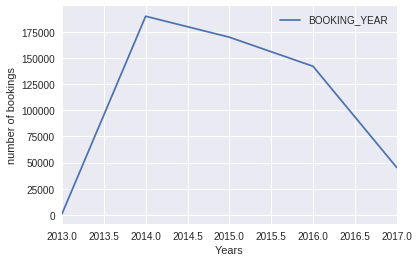

In [163]:
yearb = db_data.BOOKING_YEAR.value_counts().sort_index().plot(legend=True)
yearb.set_xlabel("Years")
yearb.set_ylabel("number of bookings")

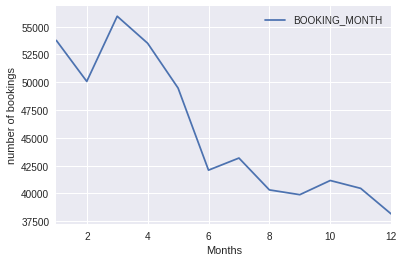

In [164]:
monthb= db_data.BOOKING_MONTH.value_counts().sort_index().plot(legend=True)
monthb.set_xlabel("Months")
monthb.set_ylabel("number of bookings")

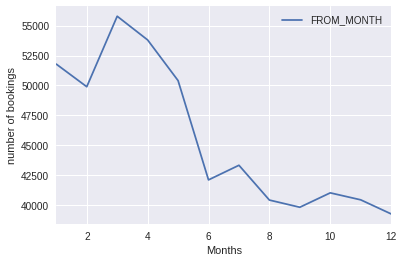

In [165]:
monthS=db_data.FROM_MONTH.value_counts().sort_index().plot(legend=True)
monthS.set_xlabel("Months")
monthS.set_ylabel("number of bookings")

In [166]:
#plt.plot(monthb, monthS)
#plt.show()

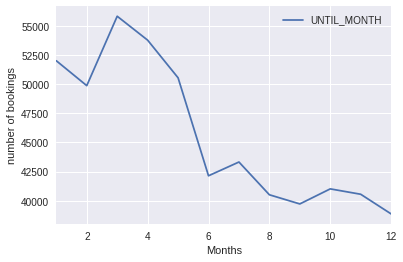

In [167]:
monthE=db_data.UNTIL_MONTH.value_counts().sort_index().plot(legend=True)
monthE.set_xlabel("Months")
monthE.set_ylabel("number of bookings")

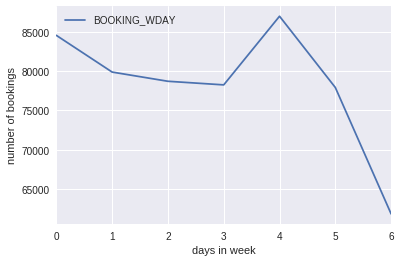

In [168]:
dayB=db_data.BOOKING_WDAY.value_counts().sort_index().plot(legend=True)
dayB.set_xlabel("days in week")
dayB.set_ylabel("number of bookings")

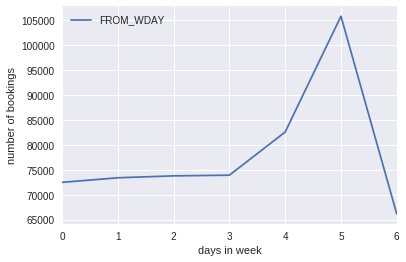

In [169]:
dayS=db_data.FROM_WDAY.value_counts().sort_index().plot(legend=True)
dayS.set_xlabel("days in week")
dayS.set_ylabel("number of bookings")

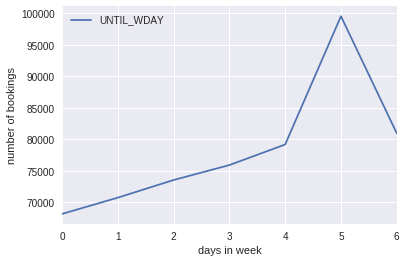

In [170]:
dayE=db_data.UNTIL_WDAY.value_counts().sort_index().plot(legend=True)
dayE.set_xlabel("days in week")
dayE.set_ylabel("number of bookings")

In [171]:
db_data.CITY_RENTAL_ZONE.value_counts()

Berlin                    155517
Köln                       96677
München                    87955
Stuttgart                  38106
Hamburg                    20001
Frankfurt am Main          18097
Mannheim                   10480
Freiburg                    9780
Hannover                    9078
Duisburg                    8083
Karlsruhe                   7241
Essen                       5236
Siegburg                    4486
Ulm                         4076
Aschaffenburg               3436
Saarbrücken                 3302
Heidelberg                  3100
Münster                     3032
Fulda                       3009
Potsdam                     3000
Düsseldorf                  2866
Troisdorf                   2844
Offenburg                   2440
Kiel                        2408
Bielefeld                   2404
Ingolstadt                  2384
Aachen                      2311
Schwerin                    2201
Heilbronn                   2108
Lübeck                      2103
          

In [172]:
#db_data[17:22].plot(subplots=True, figsize=(16, 18));

In [173]:
one_tenth = db_data.sample(frac = .1, random_state=np.random.randint(10))

In [174]:
one_tenth.shape

(54807, 24)

In [175]:
one_tenth = one_tenth.sort_values(by=['DATE_BOOKING'], ascending=[True])

In [296]:
one_tenth.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
10,19969142,100002,148694,390C96CE2A960A0DB73C5C972751CE97BB29C2E4,2013-09-18 10:36:49,2014-01-16 18:30:00,2014-01-16 23:15:00,Nein,Nein,83.0,...,Station,Offenburg,Internet,2013,9,2,1,1,3,3
14,19969162,100006,151781,9D562F0C6E92EF378FE4CE66133949E212B429D2,2013-09-18 10:37:46,2014-01-29 10:15:00,2014-01-29 17:45:00,Ja,Nein,48.0,...,Station,Hamburg,NaN,2013,9,2,1,1,2,2
15,20102722,100001,149911,D12078C40370CE93FBD63CB1B9DEAB6DD9239584,2013-09-26 14:48:00,2014-01-12 21:30:00,2014-01-12 23:15:00,Nein,Nein,38.0,...,Station,Berlin,Internet,2013,9,3,1,1,6,6
17,20169502,100002,156682,1203E8643BF967C12CB34518AF6DAFAD6D21F2D2,2013-09-30 15:39:16,2014-04-26 16:00:00,2014-05-01 09:15:00,Nein,Nein,307.0,...,Station,Offenburg,Internet,2013,9,0,4,5,5,3
31,20409165,100002,150240,B43B7C51E993DFEADA4F74FDE8DFEEFA51CD5DD3,2013-10-16 17:55:15,2014-02-04 10:45:00,2014-02-06 17:45:00,Nein,Nein,237.0,...,Station,Duisburg,Internet,2013,10,2,2,2,1,3


In [177]:
#from pd.plotting import autocorrelation_plot

#autocorrelation_plot(db_data['DATE_BOOKING', 'DISTANCE'])

In [178]:
#one_tenth[[4,5,6,9,17,18,19,20,21]].plot(subplots=True, figsize=(16, 18));

In [179]:
#sns.pairplot(db_data["Distance"], kind = "reg");

In [180]:
#g = sns.PairGrid(db_data, vars=["DISTANCE", "BOOKING_MONTH"], hue=["CITY_RENTAL_ZONE"])
#g.map(plt.scatter);

In [181]:
#plt.scatter(db_data['BOOKING_MONTH'], db_data['BOOKING_YEAR'])
#plt.show()

In [195]:
#db_data.groupby(['BOOKING_WDAY', 'BOOKING_MONTH'])['DISTANCE'].mean().plot()


In [197]:
"""for title, group in db_data.groupby('BOOKING_YEAR'):
    group.plot(x='BOOKING_MONTH', y='BOOKING_WDAY', title=title, subplots=True
)"""

"for title, group in db_data.groupby('BOOKING_YEAR'):\n    group.plot(x='BOOKING_MONTH', y='BOOKING_WDAY', title=title, subplots=True\n)"

In [294]:
db_data['TECHNICAL_INCOME_CHANNEL'].fillna('UNKNOWN', inplace=True)

In [295]:
db_data['TECHNICAL_INCOME_CHANNEL'].value_counts(dropna=False)

Internet                       324400
Flinkster iPhone               101971
Flinkster Android               52498
UNKNOWN                         51976
ICS-Server                       3177
Flinkster Windows                2212
Multicity iPhone                 1971
Broker HAL                       1857
Multicity Android                1412
BwFPS Portal Web                 1182
BwCarsharing iPhone               880
Bahn_de_2                         820
HALAPI Teilauto                   732
BwCarsharing Android              649
Book-n-Drive iPhone               545
Onesto_Bahn                       338
API                               236
Book-n-Drive Android              228
ford2go iPhone                    147
ford2go Android                   146
Scouter 255 Web Praegnanz         135
Scouter 255 iOS 2Denker           122
teilAuto                          120
Ford Carsharing FordPass           61
Scouter 255 Android 2Denker        53
Flinkster Connect                  46
BwFPS Dispo 

In [219]:
#db_data['DISTANCE'].fillna(db_data['DISTANCE'].mean, inplace=True)

In [222]:
#db_data[db_data.DISTANCE.isnull()].sort_index()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL


In [239]:
#db_data[17:22].plot(subplots=True, figsize=(16, 18))

In [316]:
day_list = ['BOOKING_WDAY','FROM_WDAY','UNTIL_WDAY']
booking_by_day = db_data.pivot_table(index='DATE_BOOKING', values=day_list, aggfunc='sum')
booking_by_day

,BOOKING_WDAY,FROM_WDAY,UNTIL_WDAY
DATE_BOOKING,,,
2013-06-05 08:49:33,2,6,6
2013-06-25 14:12:08,1,1,1
2013-08-01 07:20:47,3,5,6
2013-08-01 09:22:07,3,5,5
2013-08-13 10:28:38,1,4,4
2013-08-13 10:29:24,1,2,2
2013-08-21 18:36:12,2,2,0
2013-08-23 00:14:48,4,5,6
2013-09-15 12:19:14,6,6,6


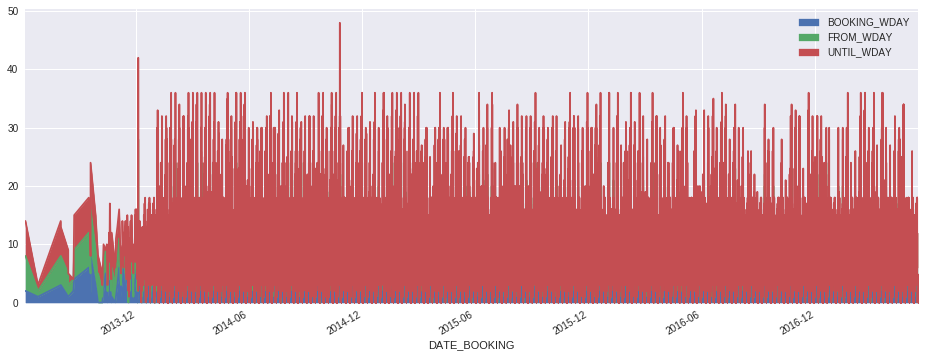

In [313]:
booking_by_day.plot(kind='area', figsize=[16,6], stacked=True)

In [318]:
month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
booking_by_month = db_data.pivot_table(index='CITY_RENTAL_ZONE', values=month_list, aggfunc='sum')
booking_by_month

,BOOKING_MONTH,FROM_MONTH,UNTIL_MONTH
CITY_RENTAL_ZONE,,,
Aachen,13823,13866,13883
Aschaffenburg,20801,20923,20916
Augsburg,12367,12464,12426
Bayreuth,793,810,815
Berlin,947632,950496,948871
Bielefeld,14601,14683,14684
Bietigheim-Bissingen,3350,3370,3358
Cottbus,4327,4427,4434
Deggenhausertal,5658,5657,5668


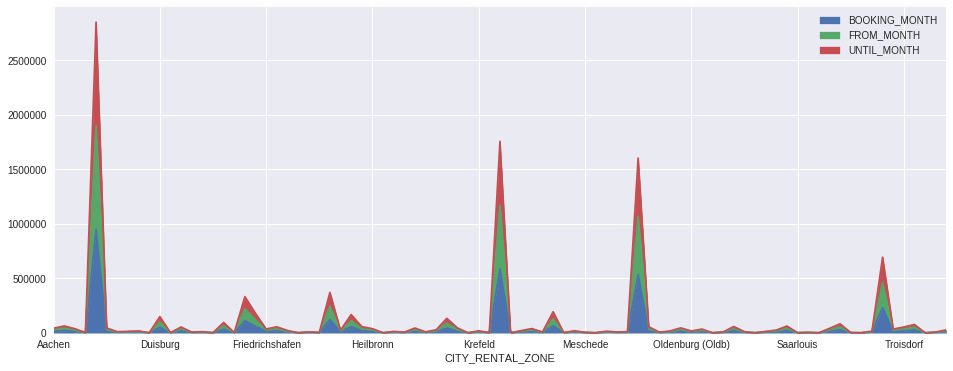

In [319]:
booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [320]:
month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
booking_by_month = db_data.pivot_table(index='DATE_BOOKING', values=month_list, aggfunc='sum')
booking_by_month

,BOOKING_MONTH,FROM_MONTH,UNTIL_MONTH
DATE_BOOKING,,,
2013-06-05 08:49:33,6,1,1
2013-06-25 14:12:08,6,5,5
2013-08-01 07:20:47,8,6,6
2013-08-01 09:22:07,8,2,2
2013-08-13 10:28:38,8,5,5
2013-08-13 10:29:24,8,8,8
2013-08-21 18:36:12,8,1,1
2013-08-23 00:14:48,8,5,5
2013-09-15 12:19:14,9,1,1


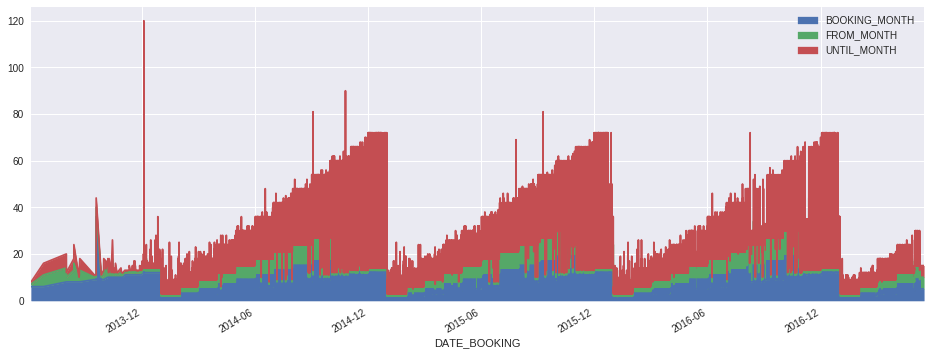

In [321]:
booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [322]:
month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
booking_by_month = db_data.pivot_table(index='BOOKING_YEAR', values=month_list, aggfunc='sum')
booking_by_month

,BOOKING_MONTH,FROM_MONTH,UNTIL_MONTH
BOOKING_YEAR,,,
2013,11462,1360,1371
2014,1229805,1236683,1235303
2015,1073196,1081246,1080346
2016,894598,901612,900402
2017,125362,129158,129598


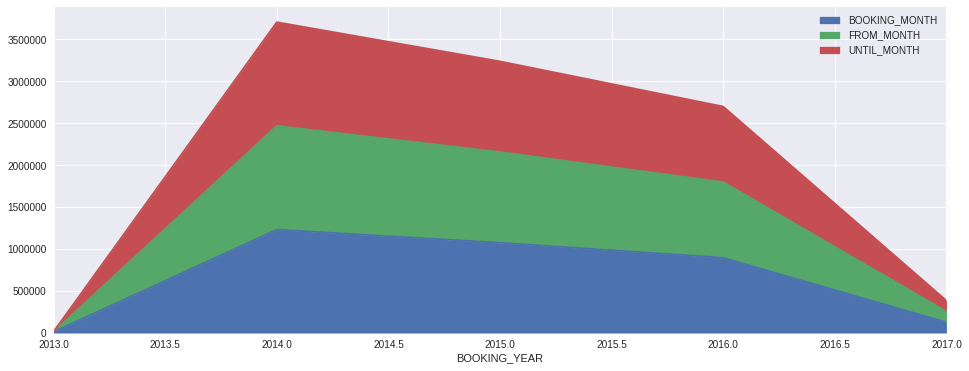

In [323]:
booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [333]:
month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
booking_by_month = db_data.pivot_table(index='BOOKING_HAL_ID', values=month_list, aggfunc='sum')
booking_by_month

,BOOKING_MONTH,FROM_MONTH,UNTIL_MONTH
BOOKING_HAL_ID,,,
17842196,6,1,1
18270895,6,5,5
19054992,8,6,6
19057626,8,2,2
19313282,8,5,5
19313291,8,8,8
19479182,8,1,1
19508250,8,5,5
19923967,9,1,1


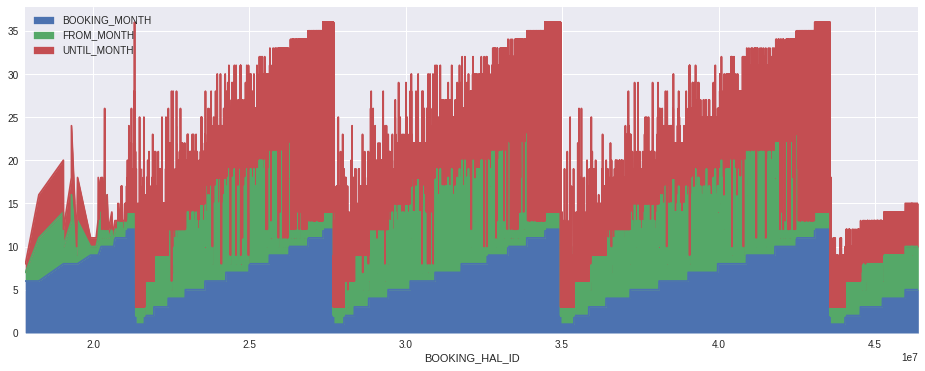

In [334]:
booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)